In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from glob import glob
from lmfit.models import GaussianModel

In [43]:
pathres = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/**/area_vec.txt'
pathsub = sorted(glob(pathres))
pathsub

['/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode1950V_Gate50V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2000V_Gate100V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2100V_Gate200V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2500V_Gate600V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode3000V_Gate1100V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode3500V_Gate1600V/area_vec.txt',
 '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode4000V_Gate2100V/area_vec.txt']

In [40]:
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [90]:
def fit_gaussian(pathfile, bin_cuts = (300, 1e4), nbins=100, exclude_index=3):
    area_vec_raw = np.loadtxt(pathfile)
    area_vec = area_vec_raw[(area_vec_raw > bin_cuts[0]) & (area_vec_raw < bin_cuts[1])]
    n, bins, _ = plt.hist(area_vec, bins=nbins, label='data', )
    cbins = 0.5 * (bins[1:] + bins[:-1])
    n = n[exclude_index:]
    cbins = cbins[exclude_index:]

    popt, pcov = curve_fit(gaussian, cbins, n, p0=[np.max(n), np.mean(cbins), np.std(cbins)])
    # plt.bar(cbins, n, width=bins[1]-bins[0], alpha=0.6, label='data')
    plt.plot(cbins, gaussian(cbins, *popt), 'r--', label='fit')
    plt.gca().set(xlabel = 'Area (mV·ns)', ylabel = 'Counts')
    plt.legend()
    mean = popt[1]
    std_error = np.sqrt(pcov[1, 1])
    ci95 = 1.96 * std_error

    return mean, ci95

In [ ]:
def lmfit_gaussian(pathfile, bin_cuts = (300, 1e4), nbins=100, exclude_index=3):
    area_vec_raw = np.loadtxt(pathfile)
    area_vec = area_vec_raw[(area_vec_raw > bin_cuts[0]) & (area_vec_raw < bin_cuts[1])]
    n, bins, _ = plt.hist(area_vec, bins=nbins, label='data', )
    cbins = 0.5 * (bins[1:] + bins[:-1])
    n = n[exclude_index:]
    cbins = cbins[exclude_index:]

    model = GaussianModel()
    params = model.make_params(amplitude=np.max(n), center=np.mean(cbins), sigma=np.std(cbins))
    result = model.fit(n, params, x=cbins)
    popt = [result.params['amplitude'].value, result.params['center'].value, result.params['sigma'].value]
    pcov = result.covar

    plt.plot(cbins, gaussian(cbins, *popt), 'r--', label='fit')
    plt.gca().set(xlabel = 'Area (mV·ns)', ylabel = 'Counts')
    plt.legend()
    mean = result.params['center'].value
    std_error = np.sqrt(pcov[1, 1])
    ci95 = 1.96 * std_error

    return mean, ci95

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode1950V_Gate50V/area_vec.txt
Mean: 715.67 ± 39.95 (95% CI)


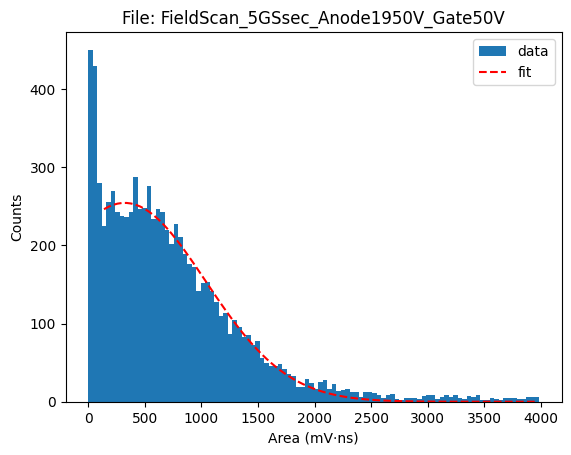

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2000V_Gate100V/area_vec.txt
Mean: 862.11 ± 32.11 (95% CI)


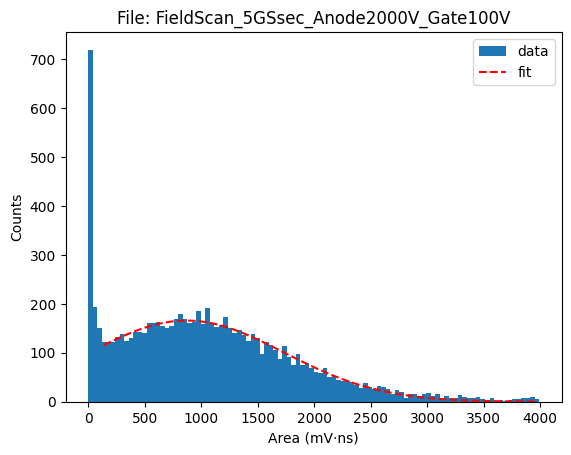

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2100V_Gate200V/area_vec.txt
Mean: 1030.22 ± 44.49 (95% CI)


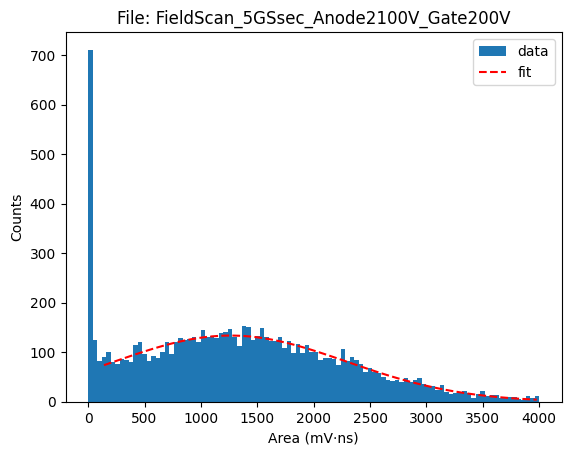

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode2500V_Gate600V/area_vec.txt
Mean: 1359.62 ± 56.75 (95% CI)


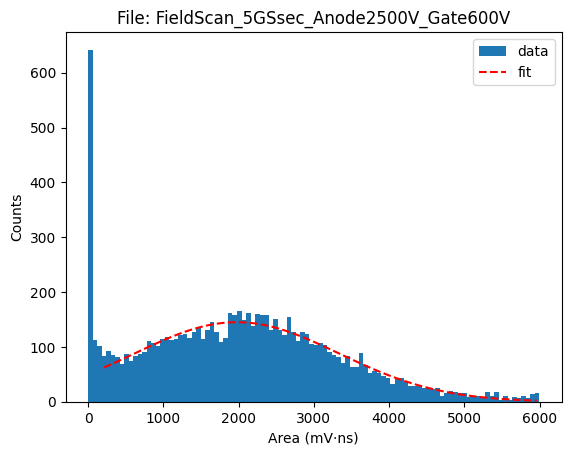

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode3000V_Gate1100V/area_vec.txt
Mean: 1583.11 ± 68.56 (95% CI)


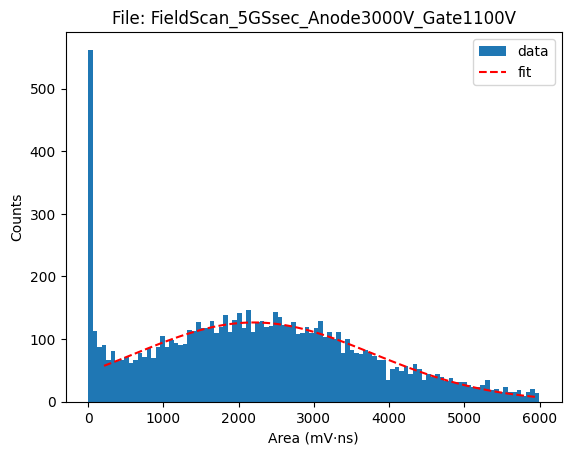

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode3500V_Gate1600V/area_vec.txt
Mean: 1677.54 ± 64.88 (95% CI)


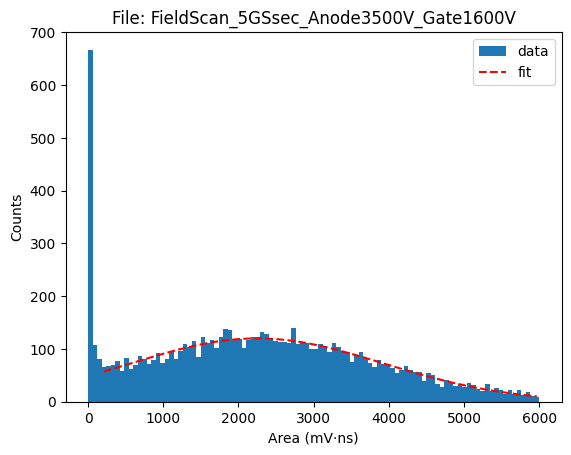

Processing file: /Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/RUN5_EL2375Vcm_5GSsec/FieldScan_5GSsec_Anode4000V_Gate2100V/area_vec.txt
Mean: 1779.54 ± 82.99 (95% CI)


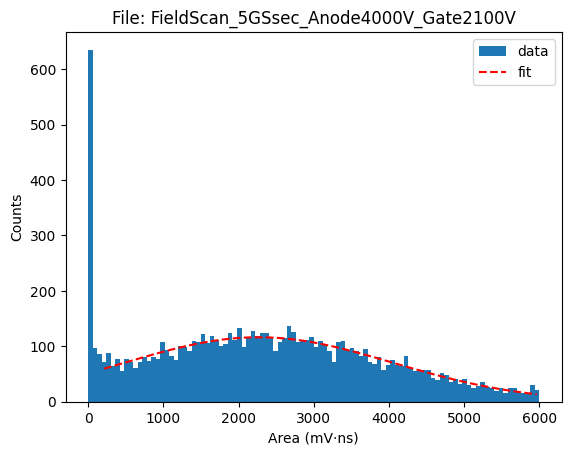

In [91]:
means = []
ci95s = []
upper_lim = [4e3, 4e3, 4e3, 6e3, 6e3, 6e3, 6e3]  # Adjust according to the voltage settings
for i, pathfile in enumerate(pathsub):
    print(f"Processing file: {pathfile}")
    mean, ci95 = fit_gaussian(pathfile, bin_cuts = (0, upper_lim[i]), nbins=100, exclude_index=3)
    means.append(mean)
    ci95s.append(ci95)
    print(f"Mean: {mean:.2f} ± {ci95:.2f} (95% CI)")
    plt.title(f"File: {pathfile.split('/')[-2]}")
    plt.show()

Text(0.5, 1.0, 'Mean S2 Area vs Drift Field')

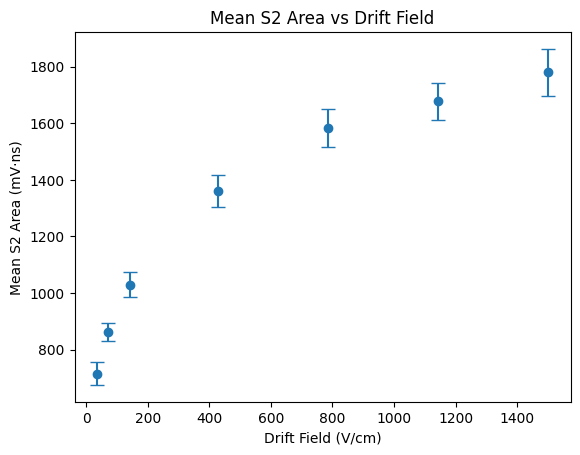

In [92]:
# Compute drift times for each (anode_voltage, gate_voltage) pair
# and plot mean S2 area vs drift time
anode_voltages = [1950, 2000, 2100, 2500, 3000, 3500, 4000]  # in V
gate_voltages = [50, 100, 200, 600, 1100, 1600, 2100]  # in V
drift_field = [g/1.4 for g in gate_voltages]  # in kV/cm

plt.errorbar(drift_field, means, yerr=ci95s, fmt='o', capsize=5)
plt.gca().set(xlabel='Drift Field (V/cm)', ylabel='Mean S2 Area (mV·ns)',
            #   ylim=(0, 2500))
)
plt.title('Mean S2 Area vs Drift Field')
# plt.grid()